# Credit Card Fraud Detection

* Avrupalı ​​kart sahipleri tarafından Eylül 2013'te kredi kartlarıyla yapılan işlemleri içermekte.
* 284.807 işlemden 492 dolandırıcılığın olduğu iki günde gerçekleşen işlemleri sunmakta.
* İşlem ve tutar dışında diğer sütunların ne olduğunu bilinmiyor (gizlilik nedeniyle). 
* Bilinmeyen sütunlar ölçeklendirilmiş.
* İşlem tutarları küçük -> ort 88 dolar
* Null değer yok.
* Veri çok dengesiz %99.83 normal, %0.17 dolandırıcılık işlemi
* PCA Dönüşümü: Verilerin açıklaması, tüm özelliklerin bir PCA dönüşümünden (Boyut Azaltma tekniği) geçtiğini söylüyor (zaman ve miktar hariç).
* Ölçeklendirme: Bir PCA dönüşümü uygulamak için özelliklerin önceden ölçeklendirilmesi gerekli. (Bu durumda, tüm V özellikleri ölçeklenmiştir veya en azından veri setini geliştiren kişilerin bunu yaptığını varsayıyoruz.)
* Özellikler V1, V2, … V28, PCA ile elde edilen başlıca bileşenlerdir, PCA ile dönüştürülmemiş yegane özellikler 'Zaman' ve 'Miktar'dır. 'Zaman' özelliği, her işlem ile veri kümesindeki ilk işlem arasında geçen saniyeleri içerir. 'Tutar' özelliği, işlem Tutarı'dır, bu özellik, örneğe bağlı, maliyete duyarlı öğrenme için kullanılabilir. Özellik 'Sınıf' yanıt değişkenidir ve dolandırıcılık durumunda 1, aksi takdirde 0 değerini alır.
* The Machine Learning Group of ULB (Université Libre de Bruxelles) and Worldline cooperated to collect the dataset for big data mining and fraud detection. 
    * Kaynak: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
        * Çalışmalar: 
            * https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset
            * https://www.researchgate.net/profile/Mohammed-Al-Shabi/publication/335526336_Credit_Card_Fraud_Detection_Using_Autoencoder_Model_in_Unbalanced_Datasets/links/5f2a7901a6fdcccc43ac10d4/Credit-Card-Fraud-Detection-Using-Autoencoder-Model-in-Unbalanced-Datasets.pdf
            * https://github.com/tusharsarkar3/XBNet
            * https://arxiv.org/pdf/2106.05239v3.pdf
            * https://arxiv.org/pdf/1911.08623v1.pdf
            * https://github.com/GuansongPang/deviation-network
            * https://github.com/xuhongzuo/DeepOD
            * https://github.com/Ryosaeba8/Anomaly_detection
            * https://github.com/robeespi/Deep-Semi-supervised-intrusion-detection-on-unstructured-Hadoop-distributed-file-system-logs
            * https://github.com/robeespi/Weakly-Supervised-Malware-Detection
            * https://arxiv.org/pdf/2206.06602v2.pdf
            * https://github.com/xuhongzuo/deep-iforest
            * https://arxiv.org/pdf/2211.06675v1.pdf (+ IEEE CIS Data set)
            * https://github.com/davidnugent2425/he-cc-fraud-detection


## Kütüphanelerin Import Edilmesi

In [1]:
#!pip3 install catboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import Sequential
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Input, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

import sys
sys.path.append(parent_dir)

import BalanceDataset as balance
import MachineLearningModels as ml_models
import DeepLearningModels as dl_models

import shap

# Veri Setinin Import Edilmesi

In [3]:
data = pd.read_csv('creditcard.csv')
df = data.copy()

# Veri Seti Yapısının İncelenmesi

In [4]:
#Vx şeklindeki özellikler PCA ile dönüştürülmüş, zaman ve miktar dönüştürülmemiş
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info() #null değerimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
def show_graphs(df):
    fraud_counts = df['Class'].value_counts()

    # pie chart
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    ax1.pie(fraud_counts, labels=['Non-fraudulent', 'Fraudulent'], colors=['lightblue', 'red'], autopct='%1.1f%%')
    ax1.set_title('Transaction Class Distribution')

    # bar plot
    ax2.bar(['Non-fraudulent', 'Fraudulent'], fraud_counts.values, color=['lightblue', 'red'])
    ax2.set_xlabel('Transaction Class')
    ax2.set_ylabel('Number of Transactions')
    ax2.set_title('Credit Card Fraud Detection')
    for i in ax2.containers:
        ax2.bar_label(i,)

    plt.show()

# Veri setimiz oldukça dengesiz

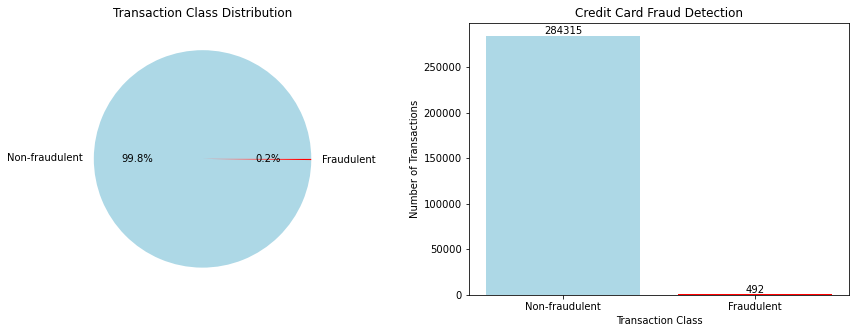

In [8]:
show_graphs(df)

In [9]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 284315 (% 99.82725143693798)
Dolandırıcılık işlemi sayısı = 492 (% 0.1727485630620034)


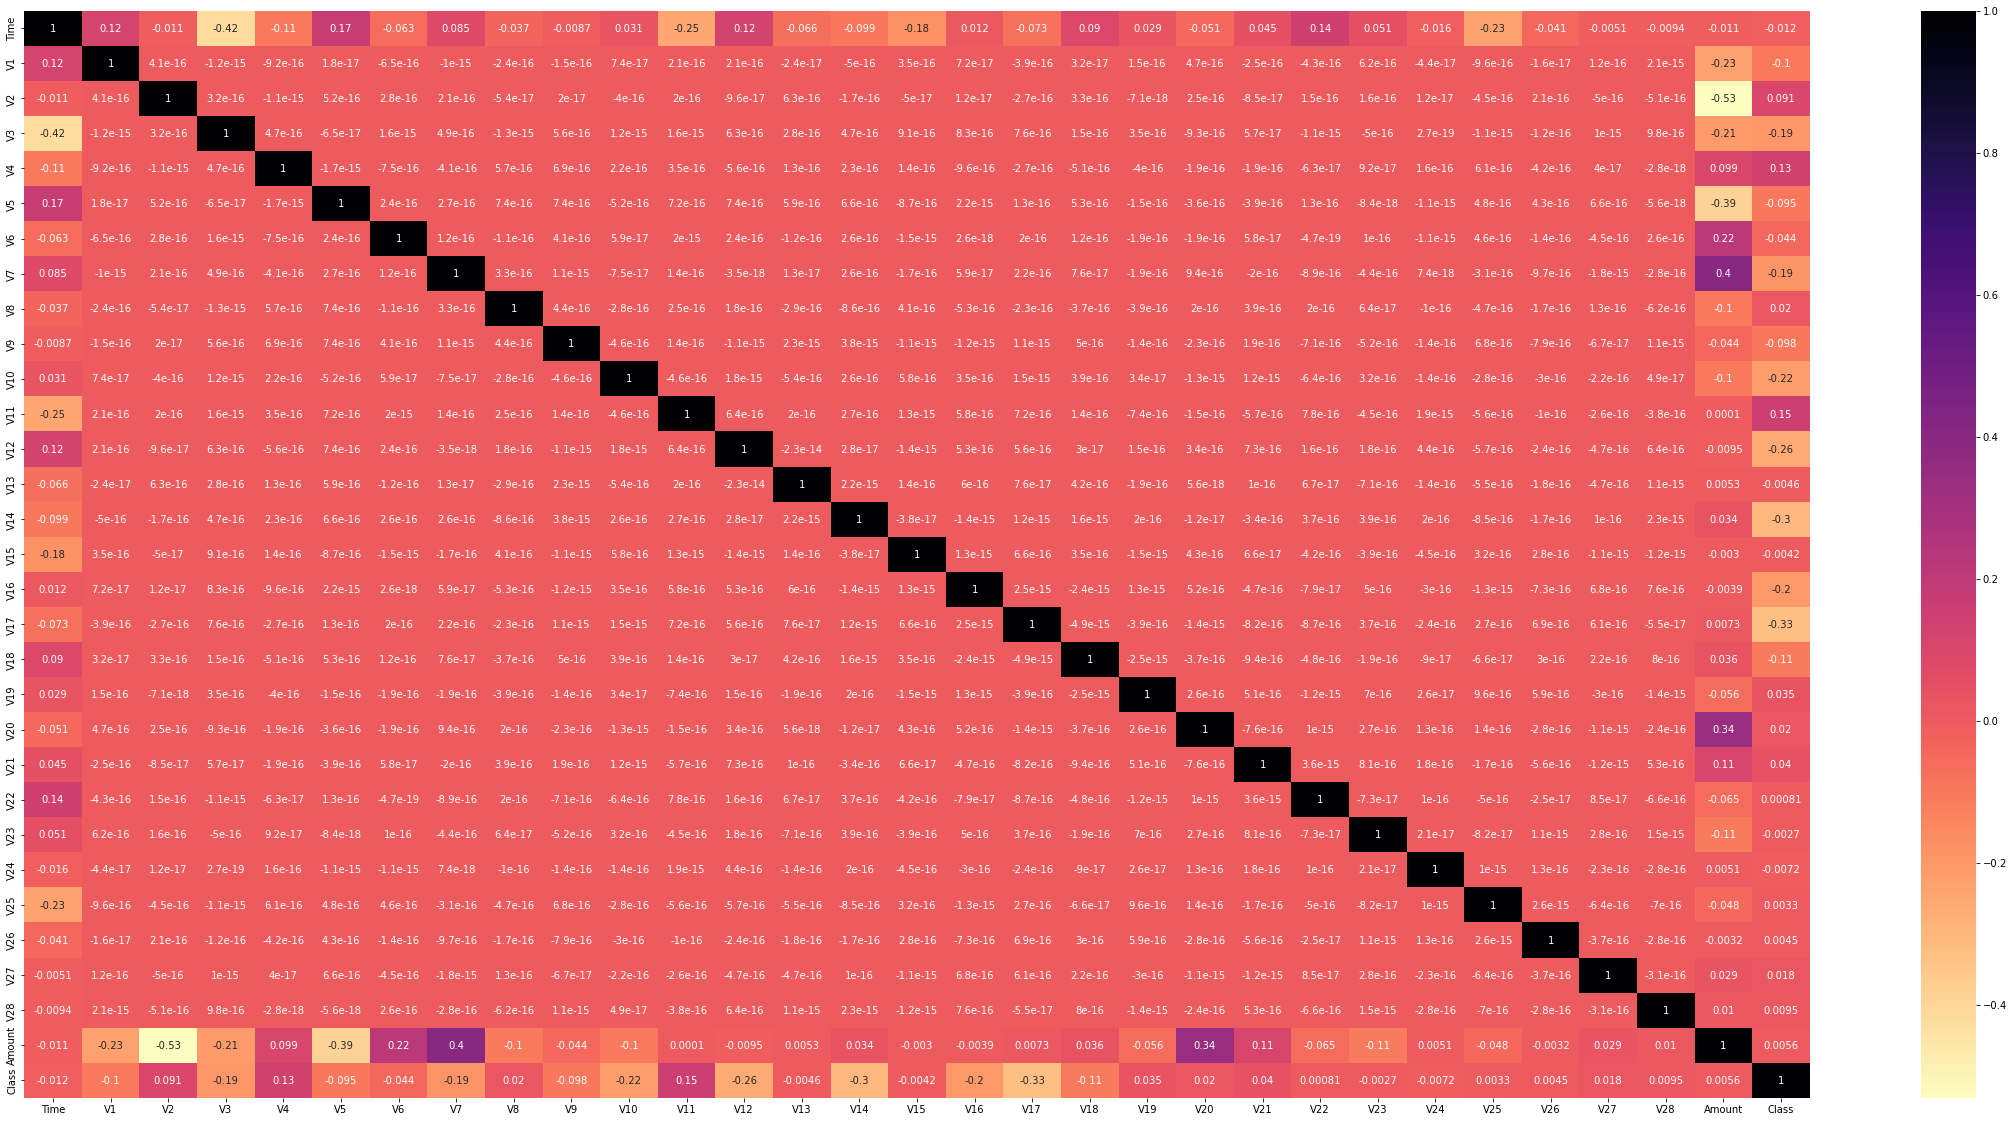

In [10]:
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

# Veri Ön İşleme

* "Time" ve "amount" sütunları dışında tüm özelliklerin PCA dönüşümünden geçirildiği bilinmekte. 
Bu bilgiye dayanarak belirtilen sütunlar dışında kalan özelliklerin ölçeklendirildiği söylenebilir. 
    * Çünkü özelliklerin PCA dönüşümü geçirebilmesi için ölçeklenmesi gerekir.


In [11]:
df.drop_duplicates(inplace=True) #tekrar eden verileri temizledik

### Aykırı Değer İşlemleri

In [12]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

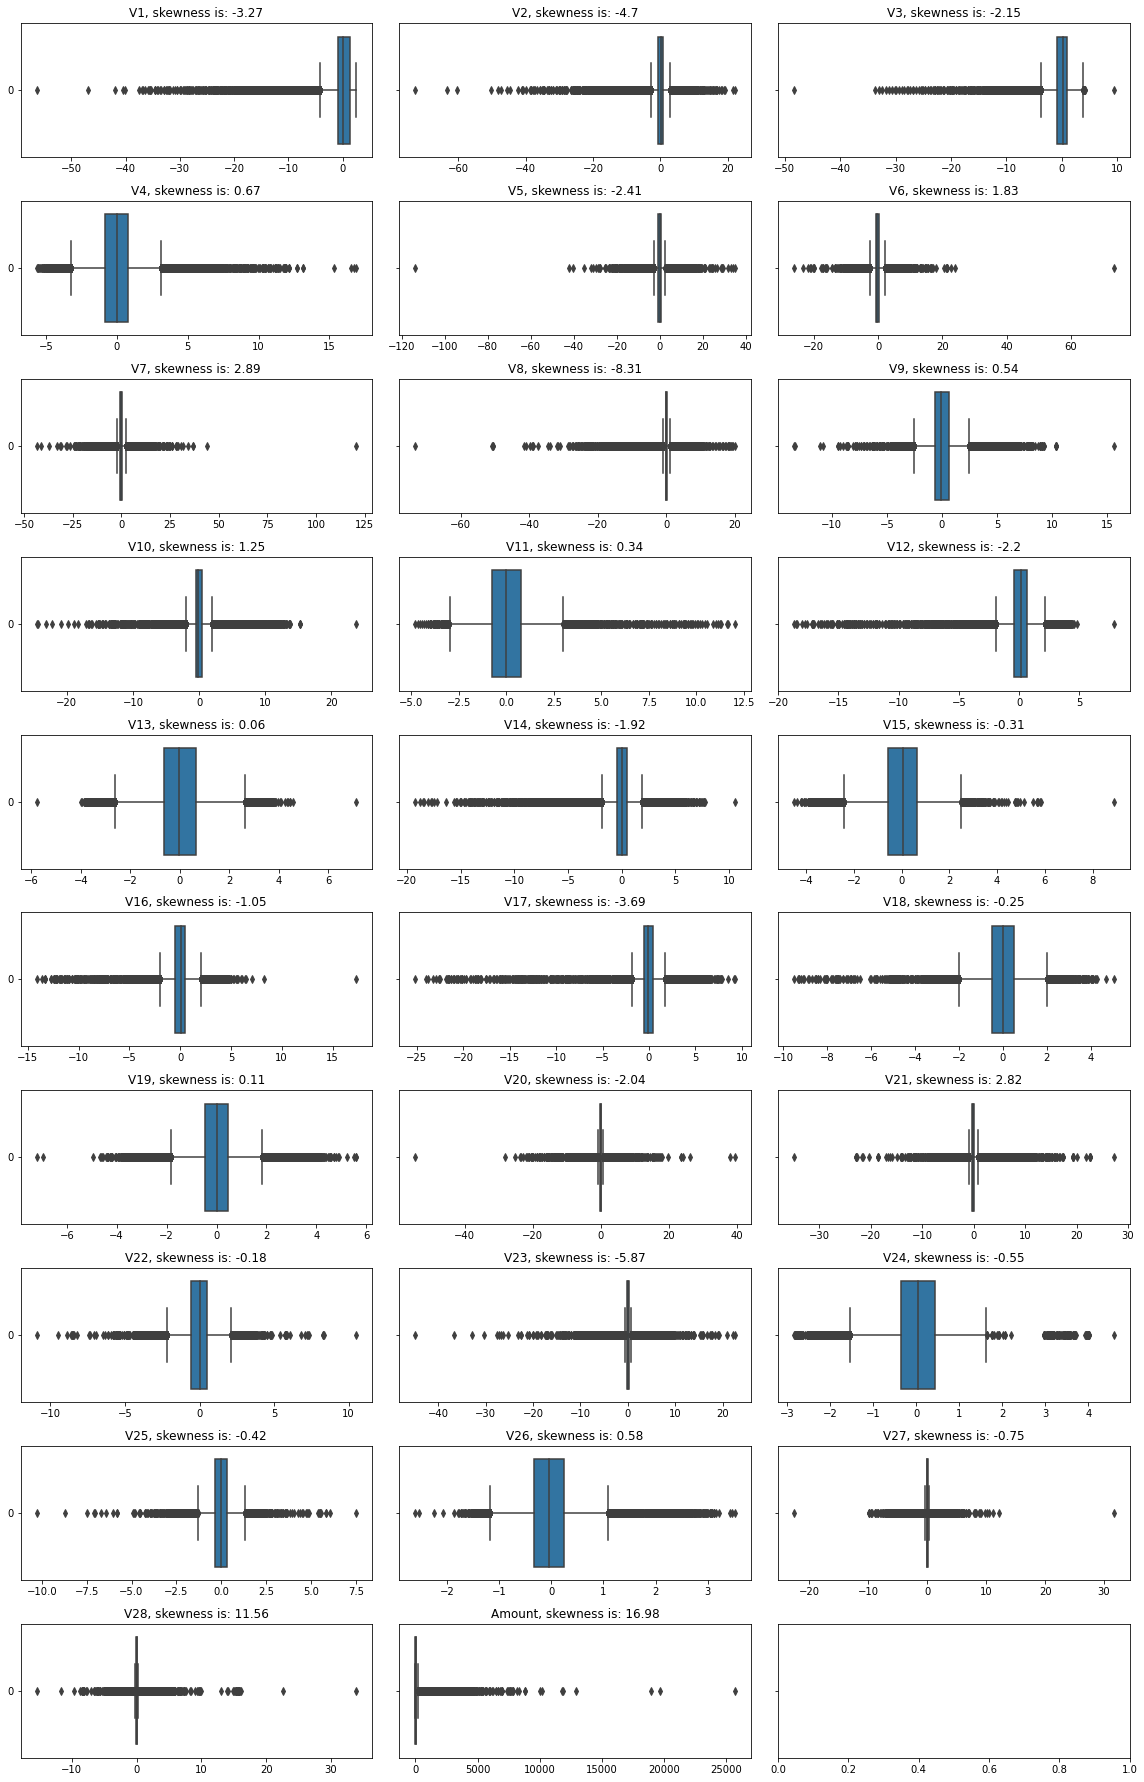

In [13]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='')
plt.tight_layout()

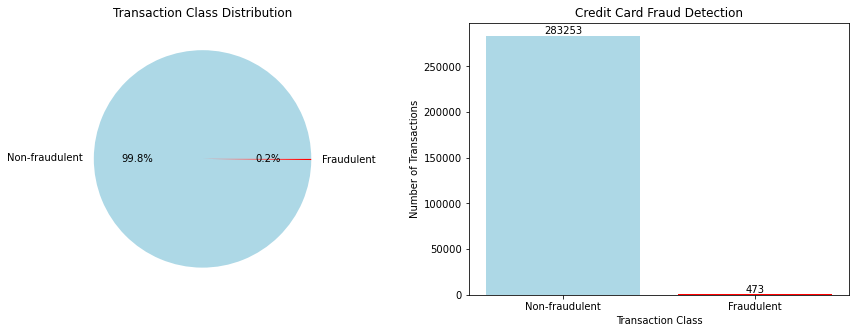

In [14]:
show_graphs(df)

In [15]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 283253 (% 99.83328986416473)
Dolandırıcılık işlemi sayısı = 473 (% 0.1667101358352777)


In [16]:
df["Class"].unique()

array([0, 1], dtype=int64)

## Feature Selection

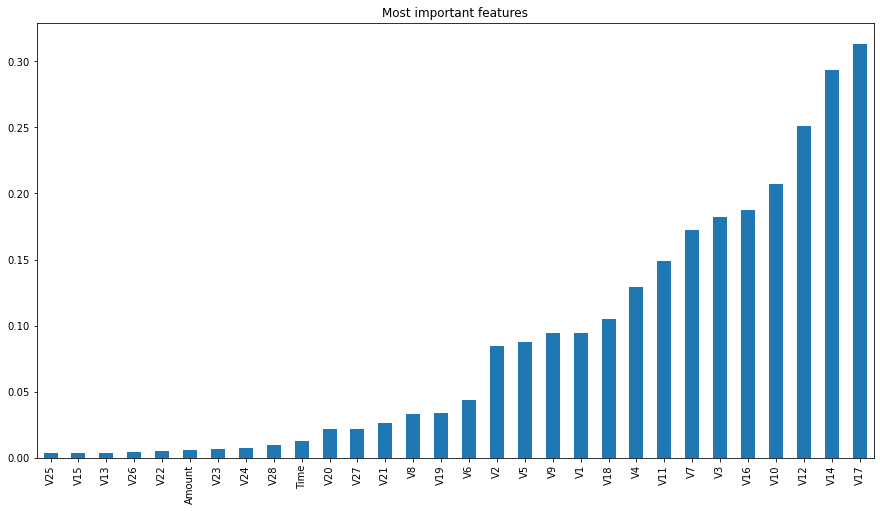

In [17]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [18]:
selected_features = df.corr()['Class'][:-1].abs() > 0.15

print (selected_features)

Time      False
V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11       False
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


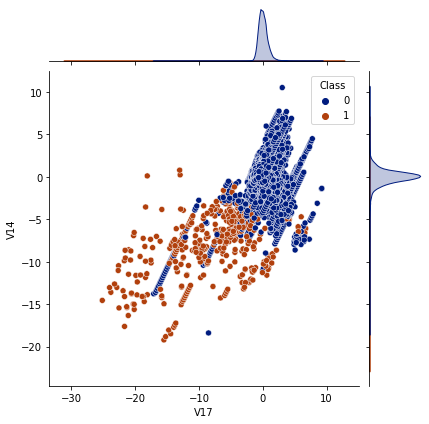

In [19]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

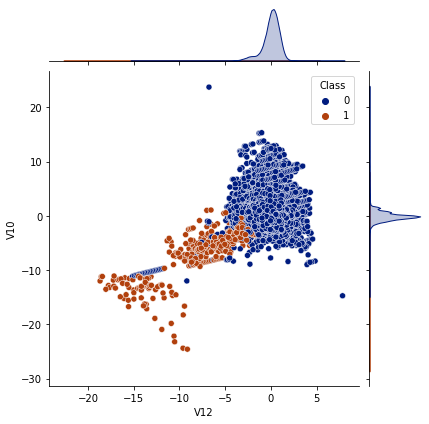

In [20]:
sns.jointplot(x='V12', y='V10', hue='Class', data=df, palette = 'dark')

# Veri Setinin Bölünmesi

### Stratified Splitting


* Bu veri kümesi bölümleri genellikle bir hedef değişkene göre rastgele oluşturulur. 
Ancak bunu yaparken, özellikle küçük veri kümeleri söz konusu olduğunda, 
hedef değişkenin farklı bölümler arasındaki oranları farklılık gösterebilir.

* Bu teknik ile, bölünmüş olan training ve test parçalarında eşit oranda sınıf yüzdesi sağlanmış olur.


In [21]:
amount = df['Amount'].values.reshape(-1, 1)

scaler = StandardScaler()
amount_scaled = scaler.fit_transform(amount)

df['Amount'] = amount_scaled

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 85)

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


# Model Oluşturma

## Oversample/Undersample Tekniklerinin Uygulanması

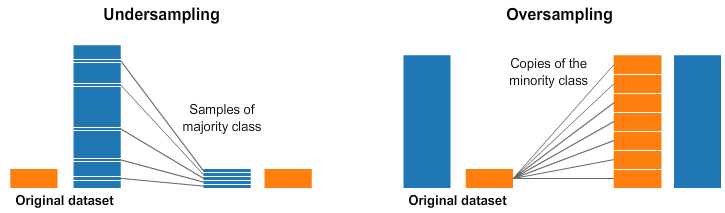

* Bu noktada göz önünde bulundurulması gereken en önemli etken veri setinin kullanılacak olan teknikten önce bölünmüş olmasıdır. Bunun asıl amacı test setinin veri yapısını bozmamaktır.

* Veri setini bölmeden oversampling tekniğinin uygulanması, aynı gözlemlerin hem test hem de training setlerinde 
bulunmasına sebebiyet verebilir. Bu, modelin yalnızca belirli veri noktalarını ezberlemesine neden olabilir, 
overfitting ve test verilerinde zayıf genellemeye neden olabilir. Veri sızıntısı, tamamen geçersiz olmasa da 
aşırı iyimser tahmin modelleri oluşturulmasına sebep olabilir.
    * Veri sızıntısı eğitim veri kümesinin dışından olan bilgiler ile model üretmek için kullanıldığı zaman ortaya çıkar.


### Random Oversampling

In [25]:
# Örnekleme ile veri arttırması kaynaklı olarak Overfittinge sebep olabilir.

In [26]:
X_train_ros, y_train_ros = balance.balancedWithRandomOverSampler(X_train,y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### Random Undersampling

In [27]:
# Verilerin kasıtlı azaltılması sonucu Underfittinge sebep olabilir. 

In [28]:
X_train_rus, y_train_rus = balance.balancedWithRandomUnderSampler(X_train,y_train)

Non-Frauds: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


### SMOTE

* SMOTE (Synthetic Minority Oversampling Technique), azınlık sınıfı için öğeleri sentezler. SMOTE, özellik uzayında yakın olan örnekleri seçerek, özellik uzayındaki örnekler arasında bir çizgi çizerek ve bu çizgi boyunca bir noktada yeni bir örnek çizerek çalışır.

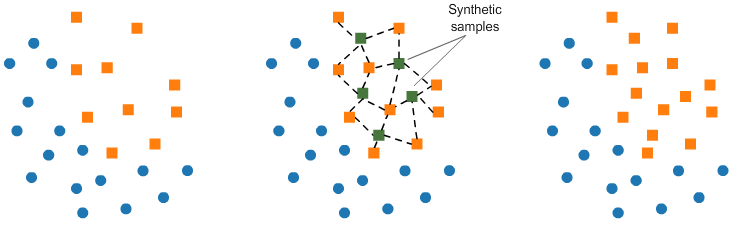

In [29]:
X_train_smote, y_train_smote = balance.balanceWithSMOTE(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### ADASYN

In [30]:
X_train_adasyn, y_train_adasyn = balance.balanceWithADASYN(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198292 / 50.0 % of the dataset


# Model Oluşturma ve Eğitme

ml_models_list = [
    
                  lgb.LGBMClassifier(), 
                  AdaBoostClassifier(),
                  GradientBoostingClassifier(),
                  CatBoostClassifier(),
                  XGBClassifier(),
                  LogisticRegression(),
                  RandomForestClassifier(),
                  KNeighborsClassifier(),
                  GaussianNB(),
                  DecisionTreeClassifier(),                  
]             

In [31]:
ml_models_list = [
    
                  lgb.LGBMClassifier(), 
                  AdaBoostClassifier(),
                  GradientBoostingClassifier(),
                  CatBoostClassifier(),
                  XGBClassifier(),               
]     

## İşlemden Geçirilmemiş Modellerin Karşılaştırılması

In [32]:
for i in ml_models_list:
    ml_models.model_performance(i, X_train, X_test, y_train, y_test, "baseline")

***** LGBMClassifier_baseline DONE *****
***** AdaBoostClassifier_baseline DONE *****
***** GradientBoostingClassifier_baseline DONE *****
Learning rate set to 0.098669
0:	learn: 0.3670587	total: 196ms	remaining: 3m 15s
1:	learn: 0.2009753	total: 218ms	remaining: 1m 48s
2:	learn: 0.1071635	total: 241ms	remaining: 1m 20s
3:	learn: 0.0589462	total: 263ms	remaining: 1m 5s
4:	learn: 0.0346868	total: 283ms	remaining: 56.4s
5:	learn: 0.0218326	total: 302ms	remaining: 50s
6:	learn: 0.0147484	total: 321ms	remaining: 45.5s
7:	learn: 0.0105116	total: 339ms	remaining: 42s
8:	learn: 0.0081243	total: 357ms	remaining: 39.3s
9:	learn: 0.0065608	total: 374ms	remaining: 37s
10:	learn: 0.0054425	total: 392ms	remaining: 35.2s
11:	learn: 0.0046577	total: 415ms	remaining: 34.2s
12:	learn: 0.0040611	total: 435ms	remaining: 33s
13:	learn: 0.0037346	total: 453ms	remaining: 31.9s
14:	learn: 0.0034500	total: 470ms	remaining: 30.9s
15:	learn: 0.0032320	total: 487ms	remaining: 30s
16:	learn: 0.0030591	total: 505m

162:	learn: 0.0011988	total: 3.34s	remaining: 17.1s
163:	learn: 0.0011961	total: 3.35s	remaining: 17.1s
164:	learn: 0.0011888	total: 3.37s	remaining: 17.1s
165:	learn: 0.0011852	total: 3.39s	remaining: 17s
166:	learn: 0.0011754	total: 3.41s	remaining: 17s
167:	learn: 0.0011739	total: 3.43s	remaining: 17s
168:	learn: 0.0011630	total: 3.45s	remaining: 17s
169:	learn: 0.0011542	total: 3.47s	remaining: 16.9s
170:	learn: 0.0011483	total: 3.48s	remaining: 16.9s
171:	learn: 0.0011462	total: 3.5s	remaining: 16.9s
172:	learn: 0.0011387	total: 3.52s	remaining: 16.8s
173:	learn: 0.0011363	total: 3.54s	remaining: 16.8s
174:	learn: 0.0011349	total: 3.56s	remaining: 16.8s
175:	learn: 0.0011319	total: 3.58s	remaining: 16.8s
176:	learn: 0.0011228	total: 3.6s	remaining: 16.7s
177:	learn: 0.0011153	total: 3.62s	remaining: 16.7s
178:	learn: 0.0011074	total: 3.63s	remaining: 16.7s
179:	learn: 0.0010997	total: 3.65s	remaining: 16.6s
180:	learn: 0.0010976	total: 3.67s	remaining: 16.6s
181:	learn: 0.0010956	

326:	learn: 0.0006751	total: 6.46s	remaining: 13.3s
327:	learn: 0.0006735	total: 6.48s	remaining: 13.3s
328:	learn: 0.0006732	total: 6.5s	remaining: 13.3s
329:	learn: 0.0006729	total: 6.52s	remaining: 13.2s
330:	learn: 0.0006722	total: 6.54s	remaining: 13.2s
331:	learn: 0.0006712	total: 6.56s	remaining: 13.2s
332:	learn: 0.0006706	total: 6.58s	remaining: 13.2s
333:	learn: 0.0006691	total: 6.59s	remaining: 13.2s
334:	learn: 0.0006665	total: 6.62s	remaining: 13.1s
335:	learn: 0.0006620	total: 6.63s	remaining: 13.1s
336:	learn: 0.0006610	total: 6.65s	remaining: 13.1s
337:	learn: 0.0006581	total: 6.67s	remaining: 13.1s
338:	learn: 0.0006527	total: 6.69s	remaining: 13.1s
339:	learn: 0.0006503	total: 6.71s	remaining: 13s
340:	learn: 0.0006483	total: 6.73s	remaining: 13s
341:	learn: 0.0006478	total: 6.75s	remaining: 13s
342:	learn: 0.0006457	total: 6.77s	remaining: 13s
343:	learn: 0.0006439	total: 6.79s	remaining: 12.9s
344:	learn: 0.0006411	total: 6.8s	remaining: 12.9s
345:	learn: 0.0006402	

494:	learn: 0.0003716	total: 9.61s	remaining: 9.81s
495:	learn: 0.0003702	total: 9.63s	remaining: 9.79s
496:	learn: 0.0003690	total: 9.65s	remaining: 9.77s
497:	learn: 0.0003670	total: 9.67s	remaining: 9.75s
498:	learn: 0.0003655	total: 9.69s	remaining: 9.73s
499:	learn: 0.0003640	total: 9.71s	remaining: 9.71s
500:	learn: 0.0003627	total: 9.73s	remaining: 9.69s
501:	learn: 0.0003598	total: 9.75s	remaining: 9.67s
502:	learn: 0.0003577	total: 9.76s	remaining: 9.65s
503:	learn: 0.0003572	total: 9.78s	remaining: 9.63s
504:	learn: 0.0003562	total: 9.8s	remaining: 9.61s
505:	learn: 0.0003545	total: 9.82s	remaining: 9.59s
506:	learn: 0.0003542	total: 9.84s	remaining: 9.57s
507:	learn: 0.0003516	total: 9.86s	remaining: 9.55s
508:	learn: 0.0003504	total: 9.88s	remaining: 9.53s
509:	learn: 0.0003484	total: 9.9s	remaining: 9.51s
510:	learn: 0.0003463	total: 9.92s	remaining: 9.49s
511:	learn: 0.0003438	total: 9.93s	remaining: 9.47s
512:	learn: 0.0003433	total: 9.95s	remaining: 9.45s
513:	learn: 0.

656:	learn: 0.0002125	total: 12.8s	remaining: 6.66s
657:	learn: 0.0002120	total: 12.8s	remaining: 6.64s
658:	learn: 0.0002102	total: 12.8s	remaining: 6.62s
659:	learn: 0.0002097	total: 12.8s	remaining: 6.6s
660:	learn: 0.0002088	total: 12.8s	remaining: 6.58s
661:	learn: 0.0002087	total: 12.8s	remaining: 6.56s
662:	learn: 0.0002072	total: 12.9s	remaining: 6.54s
663:	learn: 0.0002070	total: 12.9s	remaining: 6.52s
664:	learn: 0.0002068	total: 12.9s	remaining: 6.5s
665:	learn: 0.0002051	total: 12.9s	remaining: 6.48s
666:	learn: 0.0002040	total: 12.9s	remaining: 6.46s
667:	learn: 0.0002038	total: 13s	remaining: 6.44s
668:	learn: 0.0002037	total: 13s	remaining: 6.42s
669:	learn: 0.0002023	total: 13s	remaining: 6.4s
670:	learn: 0.0002017	total: 13s	remaining: 6.38s
671:	learn: 0.0002015	total: 13s	remaining: 6.36s
672:	learn: 0.0002014	total: 13s	remaining: 6.34s
673:	learn: 0.0002012	total: 13.1s	remaining: 6.32s
674:	learn: 0.0002009	total: 13.1s	remaining: 6.3s
675:	learn: 0.0002009	total:

823:	learn: 0.0001418	total: 15.8s	remaining: 3.38s
824:	learn: 0.0001402	total: 15.8s	remaining: 3.36s
825:	learn: 0.0001401	total: 15.9s	remaining: 3.34s
826:	learn: 0.0001387	total: 15.9s	remaining: 3.32s
827:	learn: 0.0001386	total: 15.9s	remaining: 3.3s
828:	learn: 0.0001385	total: 15.9s	remaining: 3.28s
829:	learn: 0.0001384	total: 15.9s	remaining: 3.26s
830:	learn: 0.0001383	total: 16s	remaining: 3.24s
831:	learn: 0.0001382	total: 16s	remaining: 3.23s
832:	learn: 0.0001379	total: 16s	remaining: 3.21s
833:	learn: 0.0001379	total: 16s	remaining: 3.19s
834:	learn: 0.0001375	total: 16s	remaining: 3.17s
835:	learn: 0.0001370	total: 16s	remaining: 3.15s
836:	learn: 0.0001368	total: 16.1s	remaining: 3.13s
837:	learn: 0.0001360	total: 16.1s	remaining: 3.11s
838:	learn: 0.0001358	total: 16.1s	remaining: 3.09s
839:	learn: 0.0001356	total: 16.1s	remaining: 3.07s
840:	learn: 0.0001355	total: 16.1s	remaining: 3.05s
841:	learn: 0.0001354	total: 16.2s	remaining: 3.03s
842:	learn: 0.0001350	tot

982:	learn: 0.0001036	total: 18.7s	remaining: 324ms
983:	learn: 0.0001035	total: 18.8s	remaining: 305ms
984:	learn: 0.0001035	total: 18.8s	remaining: 286ms
985:	learn: 0.0001034	total: 18.8s	remaining: 267ms
986:	learn: 0.0001034	total: 18.8s	remaining: 248ms
987:	learn: 0.0001032	total: 18.8s	remaining: 229ms
988:	learn: 0.0001030	total: 18.8s	remaining: 210ms
989:	learn: 0.0001029	total: 18.9s	remaining: 191ms
990:	learn: 0.0001027	total: 18.9s	remaining: 171ms
991:	learn: 0.0001023	total: 18.9s	remaining: 152ms
992:	learn: 0.0001022	total: 18.9s	remaining: 133ms
993:	learn: 0.0001020	total: 18.9s	remaining: 114ms
994:	learn: 0.0001019	total: 19s	remaining: 95.2ms
995:	learn: 0.0001019	total: 19s	remaining: 76.2ms
996:	learn: 0.0001016	total: 19s	remaining: 57.1ms
997:	learn: 0.0001015	total: 19s	remaining: 38.1ms
998:	learn: 0.0001012	total: 19s	remaining: 19ms
999:	learn: 0.0001011	total: 19s	remaining: 0us
***** CatBoostClassifier_baseline DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_baseline DONE *****


In [33]:
ml_models.all_performances.sort_values(by=['f1_score','AUC'], ascending=False)

,model_name,precision,recall,f1_score,AUC
4,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
3,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
1,AdaBoostClassifier_baseline,0.806723,0.676056,0.735632,0.837893
2,GradientBoostingClassifier_baseline,0.822430,0.619718,0.706827,0.809747
0,LGBMClassifier_baseline,0.117143,0.288732,0.166667,0.642548


## Çeşitli Teknikler ile Dengelenmiş Modellerin Karşılaştırılması

In [34]:
for i in ml_models_list:
    ml_models.model_performance(i, X_train_ros, X_test, y_train_ros, y_test, "RandomOverSampler")
    ml_models.model_performance(i, X_train_rus, X_test, y_train_rus, y_test, "RandomUnderSampler")
    ml_models.model_performance(i, X_train_smote, X_test, y_train_smote, y_test, "SMOTE")
    ml_models.model_performance(i, X_train_adasyn, X_test, y_train_adasyn, y_test, "ADASYN")

***** LGBMClassifier_RandomOverSampler DONE *****
***** LGBMClassifier_RandomUnderSampler DONE *****
***** LGBMClassifier_SMOTE DONE *****
***** LGBMClassifier_ADASYN DONE *****
***** AdaBoostClassifier_RandomOverSampler DONE *****
***** AdaBoostClassifier_RandomUnderSampler DONE *****
***** AdaBoostClassifier_SMOTE DONE *****
***** AdaBoostClassifier_ADASYN DONE *****
***** GradientBoostingClassifier_RandomOverSampler DONE *****
***** GradientBoostingClassifier_RandomUnderSampler DONE *****
***** GradientBoostingClassifier_SMOTE DONE *****
***** GradientBoostingClassifier_ADASYN DONE *****
Learning rate set to 0.132559
0:	learn: 0.4356525	total: 41.7ms	remaining: 41.6s
1:	learn: 0.3015176	total: 82.3ms	remaining: 41.1s
2:	learn: 0.2204411	total: 124ms	remaining: 41.3s
3:	learn: 0.1655630	total: 160ms	remaining: 39.8s
4:	learn: 0.1432385	total: 201ms	remaining: 40.1s
5:	learn: 0.1137317	total: 240ms	remaining: 39.8s
6:	learn: 0.0934016	total: 275ms	remaining: 39s
7:	learn: 0.0824292	to

151:	learn: 0.0014419	total: 5.1s	remaining: 28.4s
152:	learn: 0.0014419	total: 5.12s	remaining: 28.4s
153:	learn: 0.0014419	total: 5.15s	remaining: 28.3s
154:	learn: 0.0014137	total: 5.18s	remaining: 28.2s
155:	learn: 0.0014136	total: 5.21s	remaining: 28.2s
156:	learn: 0.0014136	total: 5.24s	remaining: 28.1s
157:	learn: 0.0013989	total: 5.27s	remaining: 28.1s
158:	learn: 0.0013989	total: 5.29s	remaining: 28s
159:	learn: 0.0013989	total: 5.33s	remaining: 28s
160:	learn: 0.0013988	total: 5.35s	remaining: 27.9s
161:	learn: 0.0013834	total: 5.39s	remaining: 27.9s
162:	learn: 0.0013834	total: 5.41s	remaining: 27.8s
163:	learn: 0.0013833	total: 5.44s	remaining: 27.7s
164:	learn: 0.0013833	total: 5.47s	remaining: 27.7s
165:	learn: 0.0013721	total: 5.5s	remaining: 27.6s
166:	learn: 0.0013721	total: 5.53s	remaining: 27.6s
167:	learn: 0.0013600	total: 5.56s	remaining: 27.5s
168:	learn: 0.0013449	total: 5.59s	remaining: 27.5s
169:	learn: 0.0013049	total: 5.62s	remaining: 27.5s
170:	learn: 0.0013

314:	learn: 0.0011089	total: 9.74s	remaining: 21.2s
315:	learn: 0.0011089	total: 9.77s	remaining: 21.1s
316:	learn: 0.0011089	total: 9.79s	remaining: 21.1s
317:	learn: 0.0011089	total: 9.82s	remaining: 21.1s
318:	learn: 0.0011089	total: 9.85s	remaining: 21s
319:	learn: 0.0011089	total: 9.87s	remaining: 21s
320:	learn: 0.0011088	total: 9.9s	remaining: 20.9s
321:	learn: 0.0011088	total: 9.93s	remaining: 20.9s
322:	learn: 0.0011088	total: 9.96s	remaining: 20.9s
323:	learn: 0.0011088	total: 9.99s	remaining: 20.8s
324:	learn: 0.0011088	total: 10s	remaining: 20.8s
325:	learn: 0.0011088	total: 10s	remaining: 20.8s
326:	learn: 0.0011087	total: 10.1s	remaining: 20.7s
327:	learn: 0.0011087	total: 10.1s	remaining: 20.7s
328:	learn: 0.0011087	total: 10.1s	remaining: 20.7s
329:	learn: 0.0011087	total: 10.2s	remaining: 20.6s
330:	learn: 0.0011087	total: 10.2s	remaining: 20.6s
331:	learn: 0.0011086	total: 10.2s	remaining: 20.5s
332:	learn: 0.0011086	total: 10.2s	remaining: 20.5s
333:	learn: 0.0011086

478:	learn: 0.0009476	total: 14.3s	remaining: 15.5s
479:	learn: 0.0009476	total: 14.3s	remaining: 15.5s
480:	learn: 0.0009476	total: 14.3s	remaining: 15.4s
481:	learn: 0.0009476	total: 14.3s	remaining: 15.4s
482:	learn: 0.0009476	total: 14.4s	remaining: 15.4s
483:	learn: 0.0009475	total: 14.4s	remaining: 15.3s
484:	learn: 0.0009475	total: 14.4s	remaining: 15.3s
485:	learn: 0.0009476	total: 14.4s	remaining: 15.3s
486:	learn: 0.0009476	total: 14.5s	remaining: 15.2s
487:	learn: 0.0009476	total: 14.5s	remaining: 15.2s
488:	learn: 0.0009476	total: 14.5s	remaining: 15.2s
489:	learn: 0.0009476	total: 14.6s	remaining: 15.2s
490:	learn: 0.0009476	total: 14.6s	remaining: 15.1s
491:	learn: 0.0009475	total: 14.6s	remaining: 15.1s
492:	learn: 0.0009475	total: 14.6s	remaining: 15.1s
493:	learn: 0.0009475	total: 14.7s	remaining: 15s
494:	learn: 0.0009475	total: 14.7s	remaining: 15s
495:	learn: 0.0009475	total: 14.7s	remaining: 15s
496:	learn: 0.0009476	total: 14.7s	remaining: 14.9s
497:	learn: 0.0009

641:	learn: 0.0009358	total: 18.6s	remaining: 10.4s
642:	learn: 0.0009358	total: 18.7s	remaining: 10.4s
643:	learn: 0.0009358	total: 18.7s	remaining: 10.3s
644:	learn: 0.0009358	total: 18.7s	remaining: 10.3s
645:	learn: 0.0009358	total: 18.8s	remaining: 10.3s
646:	learn: 0.0009358	total: 18.8s	remaining: 10.2s
647:	learn: 0.0009358	total: 18.8s	remaining: 10.2s
648:	learn: 0.0009358	total: 18.8s	remaining: 10.2s
649:	learn: 0.0009358	total: 18.9s	remaining: 10.2s
650:	learn: 0.0009358	total: 18.9s	remaining: 10.1s
651:	learn: 0.0009358	total: 18.9s	remaining: 10.1s
652:	learn: 0.0009358	total: 19s	remaining: 10.1s
653:	learn: 0.0009358	total: 19s	remaining: 10s
654:	learn: 0.0009358	total: 19s	remaining: 10s
655:	learn: 0.0009358	total: 19s	remaining: 9.98s
656:	learn: 0.0009358	total: 19.1s	remaining: 9.95s
657:	learn: 0.0009358	total: 19.1s	remaining: 9.93s
658:	learn: 0.0009358	total: 19.1s	remaining: 9.89s
659:	learn: 0.0009358	total: 19.1s	remaining: 9.87s
660:	learn: 0.0009358	to

801:	learn: 0.0009358	total: 23.3s	remaining: 5.76s
802:	learn: 0.0009358	total: 23.3s	remaining: 5.73s
803:	learn: 0.0009358	total: 23.4s	remaining: 5.7s
804:	learn: 0.0009358	total: 23.4s	remaining: 5.67s
805:	learn: 0.0009358	total: 23.4s	remaining: 5.64s
806:	learn: 0.0009358	total: 23.4s	remaining: 5.61s
807:	learn: 0.0009358	total: 23.5s	remaining: 5.58s
808:	learn: 0.0009358	total: 23.5s	remaining: 5.55s
809:	learn: 0.0009358	total: 23.5s	remaining: 5.52s
810:	learn: 0.0009358	total: 23.5s	remaining: 5.49s
811:	learn: 0.0009358	total: 23.6s	remaining: 5.46s
812:	learn: 0.0009358	total: 23.6s	remaining: 5.43s
813:	learn: 0.0009358	total: 23.6s	remaining: 5.4s
814:	learn: 0.0009358	total: 23.6s	remaining: 5.37s
815:	learn: 0.0009358	total: 23.7s	remaining: 5.34s
816:	learn: 0.0009358	total: 23.7s	remaining: 5.31s
817:	learn: 0.0009358	total: 23.7s	remaining: 5.28s
818:	learn: 0.0009358	total: 23.8s	remaining: 5.25s
819:	learn: 0.0009358	total: 23.8s	remaining: 5.22s
820:	learn: 0.

965:	learn: 0.0009357	total: 27.6s	remaining: 971ms
966:	learn: 0.0009357	total: 27.6s	remaining: 943ms
967:	learn: 0.0009357	total: 27.6s	remaining: 914ms
968:	learn: 0.0009357	total: 27.7s	remaining: 885ms
969:	learn: 0.0009357	total: 27.7s	remaining: 857ms
970:	learn: 0.0009357	total: 27.7s	remaining: 828ms
971:	learn: 0.0009357	total: 27.8s	remaining: 799ms
972:	learn: 0.0009357	total: 27.8s	remaining: 771ms
973:	learn: 0.0009357	total: 27.8s	remaining: 742ms
974:	learn: 0.0009357	total: 27.8s	remaining: 714ms
975:	learn: 0.0009357	total: 27.9s	remaining: 685ms
976:	learn: 0.0009357	total: 27.9s	remaining: 657ms
977:	learn: 0.0009357	total: 27.9s	remaining: 628ms
978:	learn: 0.0009357	total: 27.9s	remaining: 599ms
979:	learn: 0.0009357	total: 28s	remaining: 571ms
980:	learn: 0.0009357	total: 28s	remaining: 542ms
981:	learn: 0.0009357	total: 28s	remaining: 514ms
982:	learn: 0.0009357	total: 28s	remaining: 485ms
983:	learn: 0.0009357	total: 28.1s	remaining: 456ms
984:	learn: 0.000935

161:	learn: 0.1444207	total: 578ms	remaining: 2.99s
162:	learn: 0.1437733	total: 582ms	remaining: 2.99s
163:	learn: 0.1430226	total: 586ms	remaining: 2.98s
164:	learn: 0.1421731	total: 589ms	remaining: 2.98s
165:	learn: 0.1414982	total: 594ms	remaining: 2.98s
166:	learn: 0.1407772	total: 599ms	remaining: 2.98s
167:	learn: 0.1400949	total: 602ms	remaining: 2.98s
168:	learn: 0.1395989	total: 606ms	remaining: 2.98s
169:	learn: 0.1388642	total: 610ms	remaining: 2.98s
170:	learn: 0.1384317	total: 613ms	remaining: 2.97s
171:	learn: 0.1378688	total: 617ms	remaining: 2.97s
172:	learn: 0.1372866	total: 621ms	remaining: 2.97s
173:	learn: 0.1365390	total: 624ms	remaining: 2.96s
174:	learn: 0.1356729	total: 628ms	remaining: 2.96s
175:	learn: 0.1352232	total: 631ms	remaining: 2.96s
176:	learn: 0.1348617	total: 635ms	remaining: 2.95s
177:	learn: 0.1342137	total: 638ms	remaining: 2.95s
178:	learn: 0.1337929	total: 642ms	remaining: 2.94s
179:	learn: 0.1332687	total: 646ms	remaining: 2.94s
180:	learn: 

361:	learn: 0.0732143	total: 1.28s	remaining: 2.26s
362:	learn: 0.0730450	total: 1.29s	remaining: 2.26s
363:	learn: 0.0729545	total: 1.29s	remaining: 2.26s
364:	learn: 0.0727189	total: 1.3s	remaining: 2.25s
365:	learn: 0.0725608	total: 1.3s	remaining: 2.25s
366:	learn: 0.0723620	total: 1.3s	remaining: 2.25s
367:	learn: 0.0721964	total: 1.31s	remaining: 2.25s
368:	learn: 0.0721435	total: 1.31s	remaining: 2.24s
369:	learn: 0.0718692	total: 1.32s	remaining: 2.24s
370:	learn: 0.0717541	total: 1.32s	remaining: 2.24s
371:	learn: 0.0715767	total: 1.32s	remaining: 2.23s
372:	learn: 0.0714536	total: 1.33s	remaining: 2.23s
373:	learn: 0.0712994	total: 1.33s	remaining: 2.23s
374:	learn: 0.0712195	total: 1.33s	remaining: 2.22s
375:	learn: 0.0711065	total: 1.34s	remaining: 2.22s
376:	learn: 0.0709249	total: 1.34s	remaining: 2.22s
377:	learn: 0.0707586	total: 1.34s	remaining: 2.21s
378:	learn: 0.0706280	total: 1.35s	remaining: 2.21s
379:	learn: 0.0705292	total: 1.35s	remaining: 2.21s
380:	learn: 0.0

556:	learn: 0.0479504	total: 2s	remaining: 1.59s
557:	learn: 0.0478356	total: 2s	remaining: 1.58s
558:	learn: 0.0477432	total: 2s	remaining: 1.58s
559:	learn: 0.0476308	total: 2.01s	remaining: 1.58s
560:	learn: 0.0476029	total: 2.01s	remaining: 1.57s
561:	learn: 0.0474281	total: 2.02s	remaining: 1.57s
562:	learn: 0.0472961	total: 2.02s	remaining: 1.57s
563:	learn: 0.0472401	total: 2.02s	remaining: 1.56s
564:	learn: 0.0471102	total: 2.03s	remaining: 1.56s
565:	learn: 0.0469816	total: 2.03s	remaining: 1.56s
566:	learn: 0.0468662	total: 2.04s	remaining: 1.55s
567:	learn: 0.0468384	total: 2.04s	remaining: 1.55s
568:	learn: 0.0467563	total: 2.04s	remaining: 1.55s
569:	learn: 0.0466762	total: 2.05s	remaining: 1.54s
570:	learn: 0.0465699	total: 2.05s	remaining: 1.54s
571:	learn: 0.0465400	total: 2.05s	remaining: 1.54s
572:	learn: 0.0465056	total: 2.06s	remaining: 1.53s
573:	learn: 0.0463897	total: 2.06s	remaining: 1.53s
574:	learn: 0.0462976	total: 2.06s	remaining: 1.52s
575:	learn: 0.0461773

749:	learn: 0.0334679	total: 2.7s	remaining: 899ms
750:	learn: 0.0334006	total: 2.7s	remaining: 896ms
751:	learn: 0.0333255	total: 2.71s	remaining: 893ms
752:	learn: 0.0332515	total: 2.71s	remaining: 889ms
753:	learn: 0.0332330	total: 2.71s	remaining: 886ms
754:	learn: 0.0332214	total: 2.72s	remaining: 882ms
755:	learn: 0.0331602	total: 2.72s	remaining: 879ms
756:	learn: 0.0330489	total: 2.73s	remaining: 875ms
757:	learn: 0.0330292	total: 2.73s	remaining: 872ms
758:	learn: 0.0330008	total: 2.73s	remaining: 868ms
759:	learn: 0.0329768	total: 2.74s	remaining: 865ms
760:	learn: 0.0328956	total: 2.74s	remaining: 861ms
761:	learn: 0.0328401	total: 2.75s	remaining: 858ms
762:	learn: 0.0327534	total: 2.75s	remaining: 854ms
763:	learn: 0.0326949	total: 2.75s	remaining: 851ms
764:	learn: 0.0326445	total: 2.76s	remaining: 847ms
765:	learn: 0.0325887	total: 2.76s	remaining: 844ms
766:	learn: 0.0325412	total: 2.77s	remaining: 840ms
767:	learn: 0.0324746	total: 2.77s	remaining: 837ms
768:	learn: 0.

937:	learn: 0.0244891	total: 3.41s	remaining: 225ms
938:	learn: 0.0244656	total: 3.41s	remaining: 222ms
939:	learn: 0.0244545	total: 3.41s	remaining: 218ms
940:	learn: 0.0244223	total: 3.42s	remaining: 214ms
941:	learn: 0.0243584	total: 3.42s	remaining: 211ms
942:	learn: 0.0242957	total: 3.42s	remaining: 207ms
943:	learn: 0.0242420	total: 3.43s	remaining: 203ms
944:	learn: 0.0241766	total: 3.43s	remaining: 200ms
945:	learn: 0.0241341	total: 3.44s	remaining: 196ms
946:	learn: 0.0240931	total: 3.44s	remaining: 192ms
947:	learn: 0.0240736	total: 3.44s	remaining: 189ms
948:	learn: 0.0240062	total: 3.44s	remaining: 185ms
949:	learn: 0.0239890	total: 3.45s	remaining: 182ms
950:	learn: 0.0239219	total: 3.45s	remaining: 178ms
951:	learn: 0.0238607	total: 3.46s	remaining: 174ms
952:	learn: 0.0238187	total: 3.46s	remaining: 171ms
953:	learn: 0.0237920	total: 3.46s	remaining: 167ms
954:	learn: 0.0237391	total: 3.46s	remaining: 163ms
955:	learn: 0.0237058	total: 3.47s	remaining: 160ms
956:	learn: 

100:	learn: 0.0062075	total: 4.22s	remaining: 37.5s
101:	learn: 0.0060843	total: 4.26s	remaining: 37.5s
102:	learn: 0.0060438	total: 4.31s	remaining: 37.5s
103:	learn: 0.0059628	total: 4.36s	remaining: 37.6s
104:	learn: 0.0058608	total: 4.41s	remaining: 37.6s
105:	learn: 0.0058070	total: 4.46s	remaining: 37.6s
106:	learn: 0.0057173	total: 4.5s	remaining: 37.6s
107:	learn: 0.0056744	total: 4.55s	remaining: 37.5s
108:	learn: 0.0056024	total: 4.6s	remaining: 37.6s
109:	learn: 0.0054962	total: 4.64s	remaining: 37.5s
110:	learn: 0.0054304	total: 4.68s	remaining: 37.5s
111:	learn: 0.0054153	total: 4.73s	remaining: 37.5s
112:	learn: 0.0053124	total: 4.76s	remaining: 37.4s
113:	learn: 0.0052508	total: 4.8s	remaining: 37.3s
114:	learn: 0.0051452	total: 4.83s	remaining: 37.2s
115:	learn: 0.0050787	total: 4.87s	remaining: 37.1s
116:	learn: 0.0050229	total: 4.91s	remaining: 37.1s
117:	learn: 0.0049094	total: 4.95s	remaining: 37s
118:	learn: 0.0048090	total: 4.99s	remaining: 36.9s
119:	learn: 0.004

263:	learn: 0.0021092	total: 9.71s	remaining: 27.1s
264:	learn: 0.0021092	total: 9.74s	remaining: 27s
265:	learn: 0.0021092	total: 9.77s	remaining: 27s
266:	learn: 0.0021092	total: 9.8s	remaining: 26.9s
267:	learn: 0.0021092	total: 9.83s	remaining: 26.8s
268:	learn: 0.0021092	total: 9.86s	remaining: 26.8s
269:	learn: 0.0021092	total: 9.89s	remaining: 26.7s
270:	learn: 0.0021092	total: 9.93s	remaining: 26.7s
271:	learn: 0.0021092	total: 9.97s	remaining: 26.7s
272:	learn: 0.0021092	total: 10s	remaining: 26.7s
273:	learn: 0.0021092	total: 10.1s	remaining: 26.6s
274:	learn: 0.0021092	total: 10.1s	remaining: 26.6s
275:	learn: 0.0021092	total: 10.1s	remaining: 26.6s
276:	learn: 0.0021092	total: 10.2s	remaining: 26.5s
277:	learn: 0.0021092	total: 10.2s	remaining: 26.5s
278:	learn: 0.0021092	total: 10.2s	remaining: 26.5s
279:	learn: 0.0021092	total: 10.3s	remaining: 26.4s
280:	learn: 0.0021092	total: 10.3s	remaining: 26.4s
281:	learn: 0.0021092	total: 10.4s	remaining: 26.4s
282:	learn: 0.00210

423:	learn: 0.0020834	total: 14.9s	remaining: 20.3s
424:	learn: 0.0020834	total: 15s	remaining: 20.2s
425:	learn: 0.0020614	total: 15s	remaining: 20.2s
426:	learn: 0.0020614	total: 15s	remaining: 20.2s
427:	learn: 0.0020388	total: 15.1s	remaining: 20.1s
428:	learn: 0.0020109	total: 15.1s	remaining: 20.1s
429:	learn: 0.0020108	total: 15.2s	remaining: 20.1s
430:	learn: 0.0020108	total: 15.2s	remaining: 20s
431:	learn: 0.0020108	total: 15.2s	remaining: 20s
432:	learn: 0.0020108	total: 15.2s	remaining: 20s
433:	learn: 0.0020108	total: 15.3s	remaining: 19.9s
434:	learn: 0.0020108	total: 15.3s	remaining: 19.9s
435:	learn: 0.0020108	total: 15.3s	remaining: 19.8s
436:	learn: 0.0020108	total: 15.4s	remaining: 19.8s
437:	learn: 0.0020108	total: 15.4s	remaining: 19.7s
438:	learn: 0.0020108	total: 15.4s	remaining: 19.7s
439:	learn: 0.0020108	total: 15.4s	remaining: 19.7s
440:	learn: 0.0020108	total: 15.5s	remaining: 19.6s
441:	learn: 0.0020108	total: 15.5s	remaining: 19.6s
442:	learn: 0.0020108	to

585:	learn: 0.0018765	total: 20.1s	remaining: 14.2s
586:	learn: 0.0018765	total: 20.1s	remaining: 14.2s
587:	learn: 0.0018765	total: 20.2s	remaining: 14.1s
588:	learn: 0.0018765	total: 20.2s	remaining: 14.1s
589:	learn: 0.0018765	total: 20.2s	remaining: 14.1s
590:	learn: 0.0018765	total: 20.3s	remaining: 14s
591:	learn: 0.0018765	total: 20.3s	remaining: 14s
592:	learn: 0.0018765	total: 20.4s	remaining: 14s
593:	learn: 0.0018765	total: 20.4s	remaining: 13.9s
594:	learn: 0.0018765	total: 20.4s	remaining: 13.9s
595:	learn: 0.0018765	total: 20.4s	remaining: 13.9s
596:	learn: 0.0018765	total: 20.5s	remaining: 13.8s
597:	learn: 0.0018765	total: 20.5s	remaining: 13.8s
598:	learn: 0.0018765	total: 20.5s	remaining: 13.7s
599:	learn: 0.0018765	total: 20.5s	remaining: 13.7s
600:	learn: 0.0018765	total: 20.6s	remaining: 13.7s
601:	learn: 0.0018765	total: 20.6s	remaining: 13.6s
602:	learn: 0.0018765	total: 20.6s	remaining: 13.6s
603:	learn: 0.0018765	total: 20.7s	remaining: 13.5s
604:	learn: 0.0018

750:	learn: 0.0018765	total: 25.2s	remaining: 8.37s
751:	learn: 0.0018765	total: 25.3s	remaining: 8.33s
752:	learn: 0.0018765	total: 25.3s	remaining: 8.29s
753:	learn: 0.0018765	total: 25.3s	remaining: 8.26s
754:	learn: 0.0018765	total: 25.4s	remaining: 8.23s
755:	learn: 0.0018765	total: 25.4s	remaining: 8.19s
756:	learn: 0.0018765	total: 25.4s	remaining: 8.16s
757:	learn: 0.0018765	total: 25.5s	remaining: 8.13s
758:	learn: 0.0018765	total: 25.5s	remaining: 8.1s
759:	learn: 0.0018765	total: 25.5s	remaining: 8.06s
760:	learn: 0.0018765	total: 25.6s	remaining: 8.03s
761:	learn: 0.0018765	total: 25.6s	remaining: 7.99s
762:	learn: 0.0018765	total: 25.6s	remaining: 7.96s
763:	learn: 0.0018765	total: 25.6s	remaining: 7.92s
764:	learn: 0.0018765	total: 25.7s	remaining: 7.88s
765:	learn: 0.0018765	total: 25.7s	remaining: 7.85s
766:	learn: 0.0018765	total: 25.7s	remaining: 7.82s
767:	learn: 0.0018765	total: 25.8s	remaining: 7.78s
768:	learn: 0.0018765	total: 25.8s	remaining: 7.75s
769:	learn: 0

914:	learn: 0.0018765	total: 30.6s	remaining: 2.84s
915:	learn: 0.0018765	total: 30.6s	remaining: 2.81s
916:	learn: 0.0018765	total: 30.7s	remaining: 2.78s
917:	learn: 0.0018765	total: 30.7s	remaining: 2.74s
918:	learn: 0.0018765	total: 30.7s	remaining: 2.71s
919:	learn: 0.0018765	total: 30.8s	remaining: 2.68s
920:	learn: 0.0018765	total: 30.8s	remaining: 2.64s
921:	learn: 0.0018765	total: 30.8s	remaining: 2.61s
922:	learn: 0.0018765	total: 30.9s	remaining: 2.58s
923:	learn: 0.0018765	total: 30.9s	remaining: 2.54s
924:	learn: 0.0018765	total: 30.9s	remaining: 2.51s
925:	learn: 0.0018765	total: 31s	remaining: 2.48s
926:	learn: 0.0018765	total: 31s	remaining: 2.44s
927:	learn: 0.0018765	total: 31s	remaining: 2.41s
928:	learn: 0.0018765	total: 31.1s	remaining: 2.38s
929:	learn: 0.0018765	total: 31.1s	remaining: 2.34s
930:	learn: 0.0018765	total: 31.1s	remaining: 2.31s
931:	learn: 0.0018765	total: 31.2s	remaining: 2.27s
932:	learn: 0.0018765	total: 31.2s	remaining: 2.24s
933:	learn: 0.0018

77:	learn: 0.0097674	total: 3s	remaining: 35.4s
78:	learn: 0.0096424	total: 3.03s	remaining: 35.4s
79:	learn: 0.0095424	total: 3.06s	remaining: 35.2s
80:	learn: 0.0094378	total: 3.09s	remaining: 35.1s
81:	learn: 0.0092640	total: 3.13s	remaining: 35.1s
82:	learn: 0.0089325	total: 3.17s	remaining: 35.1s
83:	learn: 0.0087419	total: 3.21s	remaining: 35.1s
84:	learn: 0.0085334	total: 3.25s	remaining: 35s
85:	learn: 0.0084475	total: 3.29s	remaining: 34.9s
86:	learn: 0.0083169	total: 3.32s	remaining: 34.9s
87:	learn: 0.0081695	total: 3.36s	remaining: 34.8s
88:	learn: 0.0080872	total: 3.39s	remaining: 34.7s
89:	learn: 0.0080188	total: 3.43s	remaining: 34.7s
90:	learn: 0.0078984	total: 3.46s	remaining: 34.6s
91:	learn: 0.0076622	total: 3.5s	remaining: 34.5s
92:	learn: 0.0075191	total: 3.53s	remaining: 34.5s
93:	learn: 0.0074285	total: 3.57s	remaining: 34.4s
94:	learn: 0.0073800	total: 3.6s	remaining: 34.3s
95:	learn: 0.0072384	total: 3.64s	remaining: 34.3s
96:	learn: 0.0071707	total: 3.68s	rema

238:	learn: 0.0030155	total: 8.17s	remaining: 26s
239:	learn: 0.0030155	total: 8.2s	remaining: 26s
240:	learn: 0.0030155	total: 8.22s	remaining: 25.9s
241:	learn: 0.0030155	total: 8.26s	remaining: 25.9s
242:	learn: 0.0030155	total: 8.3s	remaining: 25.9s
243:	learn: 0.0030155	total: 8.34s	remaining: 25.8s
244:	learn: 0.0030155	total: 8.38s	remaining: 25.8s
245:	learn: 0.0030155	total: 8.42s	remaining: 25.8s
246:	learn: 0.0030155	total: 8.47s	remaining: 25.8s
247:	learn: 0.0030155	total: 8.5s	remaining: 25.8s
248:	learn: 0.0030155	total: 8.53s	remaining: 25.7s
249:	learn: 0.0030155	total: 8.56s	remaining: 25.7s
250:	learn: 0.0030155	total: 8.59s	remaining: 25.6s
251:	learn: 0.0030155	total: 8.62s	remaining: 25.6s
252:	learn: 0.0030155	total: 8.65s	remaining: 25.5s
253:	learn: 0.0030155	total: 8.68s	remaining: 25.5s
254:	learn: 0.0030155	total: 8.71s	remaining: 25.4s
255:	learn: 0.0030155	total: 8.74s	remaining: 25.4s
256:	learn: 0.0030154	total: 8.77s	remaining: 25.3s
257:	learn: 0.00301

402:	learn: 0.0030153	total: 12.9s	remaining: 19.1s
403:	learn: 0.0030153	total: 12.9s	remaining: 19.1s
404:	learn: 0.0030153	total: 13s	remaining: 19s
405:	learn: 0.0030153	total: 13s	remaining: 19s
406:	learn: 0.0030153	total: 13s	remaining: 19s
407:	learn: 0.0030153	total: 13s	remaining: 18.9s
408:	learn: 0.0030153	total: 13.1s	remaining: 18.9s
409:	learn: 0.0030153	total: 13.1s	remaining: 18.8s
410:	learn: 0.0030153	total: 13.1s	remaining: 18.8s
411:	learn: 0.0030153	total: 13.2s	remaining: 18.8s
412:	learn: 0.0030153	total: 13.2s	remaining: 18.7s
413:	learn: 0.0030153	total: 13.2s	remaining: 18.7s
414:	learn: 0.0030153	total: 13.2s	remaining: 18.7s
415:	learn: 0.0030153	total: 13.3s	remaining: 18.6s
416:	learn: 0.0030153	total: 13.3s	remaining: 18.6s
417:	learn: 0.0030153	total: 13.3s	remaining: 18.5s
418:	learn: 0.0030153	total: 13.3s	remaining: 18.5s
419:	learn: 0.0030153	total: 13.4s	remaining: 18.5s
420:	learn: 0.0030153	total: 13.4s	remaining: 18.4s
421:	learn: 0.0030153	tota

567:	learn: 0.0030153	total: 17.6s	remaining: 13.4s
568:	learn: 0.0030153	total: 17.7s	remaining: 13.4s
569:	learn: 0.0030153	total: 17.7s	remaining: 13.4s
570:	learn: 0.0030153	total: 17.7s	remaining: 13.3s
571:	learn: 0.0030153	total: 17.8s	remaining: 13.3s
572:	learn: 0.0030153	total: 17.8s	remaining: 13.3s
573:	learn: 0.0030153	total: 17.8s	remaining: 13.2s
574:	learn: 0.0030153	total: 17.8s	remaining: 13.2s
575:	learn: 0.0030153	total: 17.9s	remaining: 13.2s
576:	learn: 0.0030153	total: 17.9s	remaining: 13.1s
577:	learn: 0.0030153	total: 17.9s	remaining: 13.1s
578:	learn: 0.0030153	total: 18s	remaining: 13.1s
579:	learn: 0.0030153	total: 18s	remaining: 13s
580:	learn: 0.0030153	total: 18s	remaining: 13s
581:	learn: 0.0030153	total: 18.1s	remaining: 13s
582:	learn: 0.0030153	total: 18.1s	remaining: 12.9s
583:	learn: 0.0030153	total: 18.1s	remaining: 12.9s
584:	learn: 0.0030153	total: 18.1s	remaining: 12.9s
585:	learn: 0.0030153	total: 18.2s	remaining: 12.8s
586:	learn: 0.0030153	to

733:	learn: 0.0030153	total: 22.5s	remaining: 8.14s
734:	learn: 0.0030153	total: 22.5s	remaining: 8.11s
735:	learn: 0.0030153	total: 22.5s	remaining: 8.07s
736:	learn: 0.0030153	total: 22.5s	remaining: 8.04s
737:	learn: 0.0030153	total: 22.6s	remaining: 8.01s
738:	learn: 0.0030153	total: 22.6s	remaining: 7.98s
739:	learn: 0.0030153	total: 22.6s	remaining: 7.95s
740:	learn: 0.0030153	total: 22.7s	remaining: 7.92s
741:	learn: 0.0030153	total: 22.7s	remaining: 7.89s
742:	learn: 0.0030153	total: 22.7s	remaining: 7.86s
743:	learn: 0.0030153	total: 22.7s	remaining: 7.83s
744:	learn: 0.0030153	total: 22.8s	remaining: 7.79s
745:	learn: 0.0030153	total: 22.8s	remaining: 7.76s
746:	learn: 0.0030153	total: 22.8s	remaining: 7.73s
747:	learn: 0.0030153	total: 22.9s	remaining: 7.7s
748:	learn: 0.0030153	total: 22.9s	remaining: 7.67s
749:	learn: 0.0030153	total: 22.9s	remaining: 7.64s
750:	learn: 0.0030153	total: 22.9s	remaining: 7.61s
751:	learn: 0.0030153	total: 23s	remaining: 7.58s
752:	learn: 0.0

897:	learn: 0.0030148	total: 27.2s	remaining: 3.09s
898:	learn: 0.0030148	total: 27.3s	remaining: 3.06s
899:	learn: 0.0030148	total: 27.3s	remaining: 3.03s
900:	learn: 0.0030148	total: 27.3s	remaining: 3s
901:	learn: 0.0030148	total: 27.3s	remaining: 2.97s
902:	learn: 0.0030148	total: 27.4s	remaining: 2.94s
903:	learn: 0.0030148	total: 27.4s	remaining: 2.91s
904:	learn: 0.0030148	total: 27.4s	remaining: 2.88s
905:	learn: 0.0030148	total: 27.5s	remaining: 2.85s
906:	learn: 0.0030148	total: 27.5s	remaining: 2.82s
907:	learn: 0.0030148	total: 27.5s	remaining: 2.79s
908:	learn: 0.0030148	total: 27.5s	remaining: 2.76s
909:	learn: 0.0030148	total: 27.6s	remaining: 2.73s
910:	learn: 0.0030148	total: 27.6s	remaining: 2.7s
911:	learn: 0.0030148	total: 27.6s	remaining: 2.67s
912:	learn: 0.0030148	total: 27.7s	remaining: 2.64s
913:	learn: 0.0030148	total: 27.7s	remaining: 2.61s
914:	learn: 0.0030148	total: 27.7s	remaining: 2.58s
915:	learn: 0.0030148	total: 27.8s	remaining: 2.54s
916:	learn: 0.00

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_RandomOverSampler DONE *****
[21:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_RandomUnderSampler DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_SMOTE DONE *****


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***** XGBClassifier_ADASYN DONE *****


In [35]:
ml_model_performances = ml_models.all_performances.sort_values(by=['f1_score','AUC'], ascending=False)
ml_model_performances

,model_name,precision,recall,f1_score,AUC
4,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
3,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
21,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
5,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
23,XGBClassifier_SMOTE,0.832117,0.802817,0.817204,0.901273
24,XGBClassifier_ADASYN,0.783784,0.816901,0.800000,0.908262
17,CatBoostClassifier_RandomOverSampler,0.761290,0.830986,0.794613,0.915275
19,CatBoostClassifier_SMOTE,0.705882,0.845070,0.769231,0.922241
20,CatBoostClassifier_ADASYN,0.670455,0.830986,0.742138,0.915152
1,AdaBoostClassifier_baseline,0.806723,0.676056,0.735632,0.837893


## Performansların Karşılaştırılması

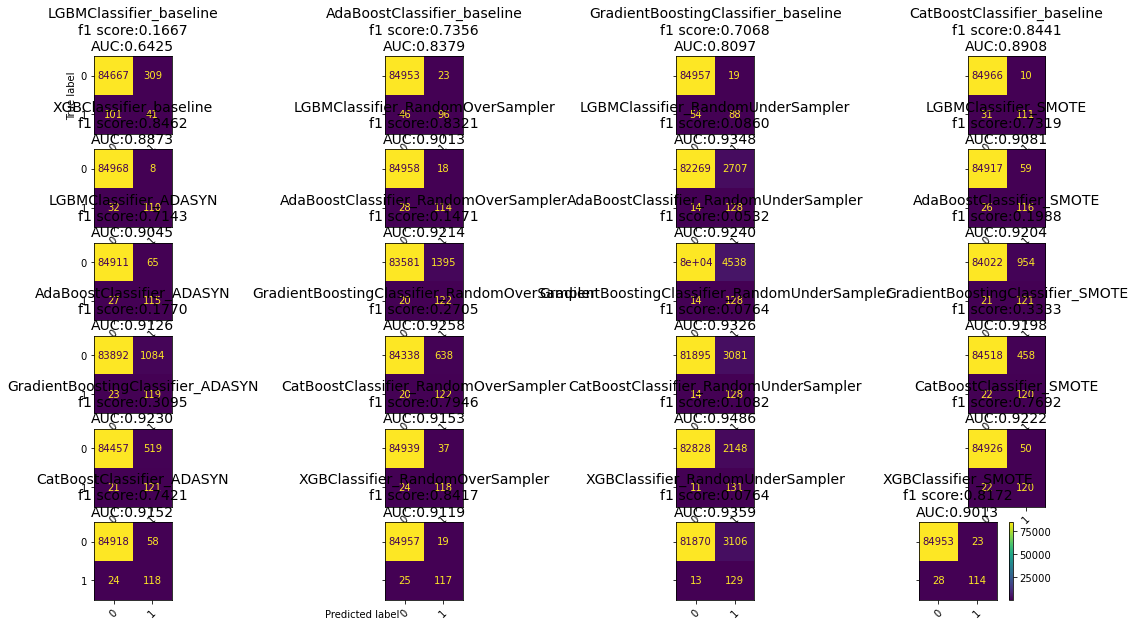

In [36]:
ml_models.display_all_confusion_matrices(y_test)

# Deep Learning

## Preprocessing

In [37]:
dl_model_performances= pd.DataFrame(columns=["model_name","precision","recall","f1_score","AUC"])

In [38]:
#data = pd.read_csv('creditcard.csv')
#df = data.copy()

In [39]:
#X = df.drop('Class', axis=1)
#y = df['Class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics=[Precision(), Recall()]

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [43]:
parameters={
    'X_train_scaled' : X_train_scaled,
    'X_test_scaled' : X_test_scaled,
    'y_train' : y_train,
    'y_test' : y_test
}

In [44]:
dl_models= [
            dl_models.ANN_model(**parameters),
            dl_models.CNN_model(**parameters),
            dl_models.RNN_model(**parameters),
            dl_models.LSTM_model(**parameters),
            dl_models.autoencoders(**parameters)
]

Epoch 1/10
1242/1242 [==============================] - 5s 3ms/step - loss: 0.0459 - precision: 0.3746 - recall: 0.3109 - auc: 0.7558 - val_loss: 0.0032 - val_precision: 0.9286 - val_recall: 0.7647 - val_auc: 0.9400
Epoch 2/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0038 - precision: 0.8916 - recall: 0.7603 - auc: 0.9416 - val_loss: 0.0030 - val_precision: 0.9298 - val_recall: 0.7794 - val_auc: 0.9335
Epoch 3/10
1242/1242 [==============================] - 2s 2ms/step - loss: 0.0026 - precision: 0.8117 - recall: 0.7313 - auc: 0.9392 - val_loss: 0.0029 - val_precision: 0.9180 - val_recall: 0.8235 - val_auc: 0.9474
Epoch 4/10
1242/1242 [==============================] - 2s 1ms/step - loss: 0.0026 - precision: 0.8875 - recall: 0.7719 - auc: 0.9539 - val_loss: 0.0029 - val_precision: 1.0000 - val_recall: 0.6471 - val_auc: 0.9334
Epoch 5/10
1242/1242 [==============================] - 2s 1ms/step - loss: 0.0024 - precision: 0.8922 - recall: 0.7529 - auc: 0.9497 - 

1242/1242 [==============================] - 2s 2ms/step - loss: 0.0017 - precision: 0.9446 - recall: 0.8271 - auc: 0.9681 - val_loss: 0.0024 - val_precision: 1.0000 - val_recall: 0.7941 - val_auc: 0.9406
Epoch 6/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0020 - precision: 0.9304 - recall: 0.7946 - auc: 0.9572 - val_loss: 0.0025 - val_precision: 0.9483 - val_recall: 0.8088 - val_auc: 0.9408
Epoch 7/10
1242/1242 [==============================] - 3s 3ms/step - loss: 0.0017 - precision: 0.9270 - recall: 0.8038 - auc: 0.9696 - val_loss: 0.0025 - val_precision: 0.9492 - val_recall: 0.8235 - val_auc: 0.9479
Epoch 8/10
1242/1242 [==============================] - 3s 3ms/step - loss: 0.0017 - precision: 0.9572 - recall: 0.8165 - auc: 0.9743 - val_loss: 0.0026 - val_precision: 0.9643 - val_recall: 0.7941 - val_auc: 0.9407
Epoch 9/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0015 - precision: 0.9642 - recall: 0.8176 - auc: 0.9864 - val_loss: 0

In [45]:
dl_models

[('ANN',
  0.9345794320106506,
  0.7042253613471985,
  0.8032128547376606,
  0.9502732157707214),
 ('CNN',
  0.9304347634315491,
  0.7535211443901062,
  0.8326848279872314,
  0.9502149224281311),
 ('RNN',
  0.8692307472229004,
  0.7957746386528015,
  0.8308823378531062,
  0.9499800205230713),
 ('LSTM',
  0.9298245906829834,
  0.7464788556098938,
  0.8281250007639749,
  0.939603328704834),
 ('Autoencoder',
  0.10414052697616061,
  0.5845070422535211,
  0.1767838125665602,
  0.9492171443270809)]

In [46]:
for i in range(len(dl_models)):
    dl_model_performances.loc[len(dl_model_performances.index)] = dl_models[i]

In [47]:
dl_model_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,CNN,0.930435,0.753521,0.832685,0.950215
1,RNN,0.869231,0.795775,0.830882,0.949980
2,LSTM,0.929825,0.746479,0.828125,0.939603
3,ANN,0.934579,0.704225,0.803213,0.950273
4,Autoencoder,0.104141,0.584507,0.176784,0.949217


In [48]:
final_result = pd.concat([ml_model_performances, dl_model_performances])

In [49]:
final_result.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
1,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
2,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
3,CNN,0.930435,0.753521,0.832685,0.950215
4,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
5,RNN,0.869231,0.795775,0.830882,0.949980
6,LSTM,0.929825,0.746479,0.828125,0.939603
7,XGBClassifier_SMOTE,0.832117,0.802817,0.817204,0.901273
8,ANN,0.934579,0.704225,0.803213,0.950273
9,XGBClassifier_ADASYN,0.783784,0.816901,0.800000,0.908262


In [50]:
ml_models.all_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)[:5]

,model_name,precision,recall,f1_score,AUC
0,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
1,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
2,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
3,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
4,XGBClassifier_SMOTE,0.832117,0.802817,0.817204,0.901273


In [51]:
dl_model_performances

,model_name,precision,recall,f1_score,AUC
0,ANN,0.934579,0.704225,0.803213,0.950273
1,CNN,0.930435,0.753521,0.832685,0.950215
2,RNN,0.869231,0.795775,0.830882,0.949980
3,LSTM,0.929825,0.746479,0.828125,0.939603
4,Autoencoder,0.104141,0.584507,0.176784,0.949217


# Hyperparameter Tuning

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [63]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [85]:
ml_models_list = [
    
                  lgb.LGBMClassifier(), 
                  #AdaBoostClassifier(),
                  #GradientBoostingClassifier(),
                  CatBoostClassifier(),
                  #XGBClassifier()
]    

In [86]:
params = {
    'n_estimators': [5,6,7,8],
    'max_depth': [2,3,4,5],
    'random_state': [0,1]
}

for i in ml_models_list:
    grid_rf = GridSearchCV(i, param_grid=params,
                       cv=kf, scoring='f1').fit(X_train, y_train)
    print(i, 'baseline Best parameters:', grid_rf.best_params_)
    print(i, 'baseline Best score:', grid_rf.best_score_)

LGBMClassifier() baseline Best parameters: {'max_depth': 2, 'n_estimators': 5, 'random_state': 0}
LGBMClassifier() baseline Best score: 0.7418117763579826
Learning rate set to 0.5
0:	learn: 0.0259147	total: 15.2ms	remaining: 60.9ms
1:	learn: 0.0064133	total: 26.5ms	remaining: 39.7ms
2:	learn: 0.0039713	total: 36.3ms	remaining: 24.2ms
3:	learn: 0.0036341	total: 47.1ms	remaining: 11.8ms
4:	learn: 0.0032849	total: 57.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0268101	total: 18.3ms	remaining: 73ms
1:	learn: 0.0061395	total: 35.4ms	remaining: 53.1ms
2:	learn: 0.0039033	total: 54.3ms	remaining: 36.2ms
3:	learn: 0.0035019	total: 69.7ms	remaining: 17.4ms
4:	learn: 0.0033123	total: 85.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0267611	total: 12.2ms	remaining: 48.7ms
1:	learn: 0.0068192	total: 25.2ms	remaining: 37.7ms
2:	learn: 0.0041871	total: 38.7ms	remaining: 25.8ms
3:	learn: 0.0036771	total: 49.9ms	remaining: 12.5ms
4:	learn: 0.0034658	total: 61.9ms	remaining: 0us
L

Learning rate set to 0.5
0:	learn: 0.0386735	total: 19.1ms	remaining: 115ms
1:	learn: 0.0067655	total: 38.8ms	remaining: 97ms
2:	learn: 0.0041522	total: 54.5ms	remaining: 72.7ms
3:	learn: 0.0035408	total: 70.5ms	remaining: 52.8ms
4:	learn: 0.0033951	total: 83.6ms	remaining: 33.4ms
5:	learn: 0.0032722	total: 99.1ms	remaining: 16.5ms
6:	learn: 0.0031818	total: 116ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0386649	total: 13.4ms	remaining: 80.2ms
1:	learn: 0.0068053	total: 24.5ms	remaining: 61.2ms
2:	learn: 0.0041185	total: 35.2ms	remaining: 47ms
3:	learn: 0.0036412	total: 48.6ms	remaining: 36.4ms
4:	learn: 0.0034829	total: 60.8ms	remaining: 24.3ms
5:	learn: 0.0033407	total: 73ms	remaining: 12.2ms
6:	learn: 0.0032667	total: 87ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0391482	total: 20.2ms	remaining: 121ms
1:	learn: 0.0067289	total: 37.1ms	remaining: 92.7ms
2:	learn: 0.0042896	total: 50.4ms	remaining: 67.2ms
3:	learn: 0.0039035	total: 61.3ms	remaining: 45.9ms
4:	lea

Learning rate set to 0.5
0:	learn: 0.0331664	total: 17.5ms	remaining: 70ms
1:	learn: 0.0062623	total: 32.2ms	remaining: 48.3ms
2:	learn: 0.0040780	total: 48.5ms	remaining: 32.3ms
3:	learn: 0.0036012	total: 66.4ms	remaining: 16.6ms
4:	learn: 0.0032525	total: 82.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0182983	total: 16.4ms	remaining: 81.9ms
1:	learn: 0.0046022	total: 31.7ms	remaining: 63.4ms
2:	learn: 0.0034526	total: 46.6ms	remaining: 46.6ms
3:	learn: 0.0028798	total: 61ms	remaining: 30.5ms
4:	learn: 0.0027360	total: 75.1ms	remaining: 15ms
5:	learn: 0.0026843	total: 90.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0196053	total: 14.2ms	remaining: 71ms
1:	learn: 0.0052294	total: 27.3ms	remaining: 54.7ms
2:	learn: 0.0035832	total: 40.2ms	remaining: 40.2ms
3:	learn: 0.0032823	total: 53.8ms	remaining: 26.9ms
4:	learn: 0.0030234	total: 65.7ms	remaining: 13.1ms
5:	learn: 0.0028971	total: 78.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0186927	total: 15.1ms

Learning rate set to 0.5
0:	learn: 0.0186927	total: 14.7ms	remaining: 103ms
1:	learn: 0.0050051	total: 27.3ms	remaining: 82ms
2:	learn: 0.0035896	total: 41ms	remaining: 68.3ms
3:	learn: 0.0032784	total: 53.5ms	remaining: 53.5ms
4:	learn: 0.0031165	total: 66.9ms	remaining: 40.1ms
5:	learn: 0.0029969	total: 80.8ms	remaining: 26.9ms
6:	learn: 0.0028243	total: 95ms	remaining: 13.6ms
7:	learn: 0.0027665	total: 109ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0186712	total: 13.9ms	remaining: 97.6ms
1:	learn: 0.0050391	total: 26.1ms	remaining: 78.3ms
2:	learn: 0.0038644	total: 38.7ms	remaining: 64.5ms
3:	learn: 0.0034206	total: 52.1ms	remaining: 52.1ms
4:	learn: 0.0030394	total: 65.4ms	remaining: 39.2ms
5:	learn: 0.0029819	total: 77.8ms	remaining: 25.9ms
6:	learn: 0.0029081	total: 91.3ms	remaining: 13ms
7:	learn: 0.0028236	total: 105ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0190715	total: 14.4ms	remaining: 101ms
1:	learn: 0.0051333	total: 26.4ms	remaining: 79.2ms
2:	lear

Learning rate set to 0.5
0:	learn: 0.0331655	total: 18ms	remaining: 89.8ms
1:	learn: 0.0060846	total: 35.4ms	remaining: 70.8ms
2:	learn: 0.0037512	total: 51.8ms	remaining: 51.8ms
3:	learn: 0.0031729	total: 67.4ms	remaining: 33.7ms
4:	learn: 0.0029900	total: 83.9ms	remaining: 16.8ms
5:	learn: 0.0028648	total: 104ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0332317	total: 24.7ms	remaining: 124ms
1:	learn: 0.0060596	total: 44.2ms	remaining: 88.3ms
2:	learn: 0.0037709	total: 62.9ms	remaining: 62.9ms
3:	learn: 0.0032291	total: 81.3ms	remaining: 40.6ms
4:	learn: 0.0030263	total: 98.7ms	remaining: 19.7ms
5:	learn: 0.0028247	total: 118ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0339513	total: 15.8ms	remaining: 78.9ms
1:	learn: 0.0062647	total: 31ms	remaining: 62.1ms
2:	learn: 0.0040479	total: 46.3ms	remaining: 46.3ms
3:	learn: 0.0034775	total: 60.4ms	remaining: 30.2ms
4:	learn: 0.0031541	total: 74.6ms	remaining: 14.9ms
5:	learn: 0.0030116	total: 88.6ms	remaining: 0us
Learn

Learning rate set to 0.5
0:	learn: 0.0339513	total: 19.1ms	remaining: 134ms
1:	learn: 0.0062647	total: 36.1ms	remaining: 108ms
2:	learn: 0.0040479	total: 52.5ms	remaining: 87.5ms
3:	learn: 0.0034775	total: 68.6ms	remaining: 68.6ms
4:	learn: 0.0031541	total: 84.3ms	remaining: 50.6ms
5:	learn: 0.0030116	total: 101ms	remaining: 33.6ms
6:	learn: 0.0029178	total: 117ms	remaining: 16.8ms
7:	learn: 0.0027731	total: 132ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0333099	total: 17.5ms	remaining: 123ms
1:	learn: 0.0061908	total: 32ms	remaining: 96.1ms
2:	learn: 0.0038095	total: 47.9ms	remaining: 79.9ms
3:	learn: 0.0032588	total: 61.8ms	remaining: 61.8ms
4:	learn: 0.0030993	total: 76.8ms	remaining: 46.1ms
5:	learn: 0.0029888	total: 91.9ms	remaining: 30.6ms
6:	learn: 0.0028549	total: 108ms	remaining: 15.4ms
7:	learn: 0.0026726	total: 122ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0186548	total: 18.8ms	remaining: 75.1ms
1:	learn: 0.0039632	total: 37.6ms	remaining: 56.5ms
2:	le

Learning rate set to 0.5
0:	learn: 0.0194667	total: 19.6ms	remaining: 118ms
1:	learn: 0.0048097	total: 40.5ms	remaining: 101ms
2:	learn: 0.0029915	total: 59.9ms	remaining: 79.9ms
3:	learn: 0.0027012	total: 80.5ms	remaining: 60.4ms
4:	learn: 0.0025953	total: 98ms	remaining: 39.2ms
5:	learn: 0.0025696	total: 117ms	remaining: 19.4ms
6:	learn: 0.0024812	total: 133ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0255207	total: 20.3ms	remaining: 122ms
1:	learn: 0.0048455	total: 36.7ms	remaining: 91.7ms
2:	learn: 0.0032889	total: 53.7ms	remaining: 71.5ms
3:	learn: 0.0026840	total: 69.2ms	remaining: 51.9ms
4:	learn: 0.0025578	total: 88.4ms	remaining: 35.4ms
5:	learn: 0.0024746	total: 106ms	remaining: 17.7ms
6:	learn: 0.0023337	total: 123ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0256604	total: 19.6ms	remaining: 117ms
1:	learn: 0.0049581	total: 36.6ms	remaining: 91.5ms
2:	learn: 0.0032583	total: 52.9ms	remaining: 70.5ms
3:	learn: 0.0028185	total: 69.3ms	remaining: 52ms
4:	lear

In [87]:
grid_rf.best_params_

{'max_depth': 4, 'n_estimators': 6, 'random_state': 0}

In [57]:
#for i in ml_models_list:
#    ml_models.model_performance(i, X_train, X_test, y_train, y_test, "baseline_ht")

In [77]:
ml_models.model_performance(CatBoostClassifier(max_depth=4, n_estimators=6, random_state=0), X_train, X_test, y_train, y_test, "baseline_ht")

Learning rate set to 0.5
0:	learn: 0.0184953	total: 19ms	remaining: 95ms
1:	learn: 0.0045933	total: 35.7ms	remaining: 71.3ms
2:	learn: 0.0034744	total: 53.9ms	remaining: 53.9ms
3:	learn: 0.0030935	total: 71ms	remaining: 35.5ms
4:	learn: 0.0029375	total: 87.3ms	remaining: 17.5ms
5:	learn: 0.0028461	total: 107ms	remaining: 0us
***** CatBoostClassifier_baseline_ht DONE *****


In [ ]:
max_depth=2, n_estimators=5, random_state=0

In [58]:
lgb.LGBMClassifier(max_depth=3, n_estimators=1, random_state=0), 
CatBoostClassifier(max_depth=4, n_estimators=6, random_state=0),

In [59]:
ml_models_list[4]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
ml_models.all_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,XGBClassifier_baseline,0.932203,0.774648,0.846154,0.887277
1,CatBoostClassifier_baseline,0.917355,0.781690,0.844106,0.890786
2,XGBClassifier_RandomOverSampler,0.860294,0.823944,0.841727,0.911860
3,LGBMClassifier_RandomOverSampler,0.863636,0.802817,0.832117,0.901303
4,XGBClassifier_SMOTE,0.832117,0.802817,0.817204,0.901273
5,XGBClassifier_ADASYN,0.783784,0.816901,0.800000,0.908262
6,CatBoostClassifier_RandomOverSampler,0.761290,0.830986,0.794613,0.915275
7,CatBoostClassifier_baseline_ht,0.841270,0.746479,0.791045,0.873122
8,LGBMClassifier_baseline_ht,0.768707,0.795775,0.782007,0.897687
9,CatBoostClassifier_SMOTE,0.705882,0.845070,0.769231,0.922241


In [83]:
params = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

In [84]:
grid_model = GridSearchCV(XGBClassifier(), param_grid=params,
                       cv=kf, scoring='f1').fit(X_train, y_train)

print(i, 'baseline Best parameters:', grid_model.best_params_)
print(i, 'baseline Best score:', grid_model.best_score_)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:23:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:25:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:39:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:49:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<catboost.core.CatBoostClassifier object at 0x0000021A8038E1C0> baseline Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
<catboost.core.CatBoostClassifier object at 0x0000021A8038E1C0> baseline Best score: 0.8661172600438005
